In [70]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [71]:
mypath = r'C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\RunTime_Min'
mypath = r"C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\Results_T1"
f = []
for (dirpath, dirnames, filenames) in os.walk(mypath):
    filenames
    break


In [72]:
number_of_configurations = len(dirnames)
number_instances_per_config = len(os.listdir(mypath + '/' + dirnames[0])) - 1


In [73]:
number_of_configurations, number_instances_per_config


(4, 28)

In [74]:
print("Folders")
dir_name_list = []
count = 0
for i, dirname in enumerate(dirnames):
    count += 1
    dir_name_list.append(dirname)
    print(i, ' ', dirname)
    


Folders
0   MC_14_Trial__22_12_03_03_58_DEFAULT
1   MC_14_Trial__22_12_03_06_21
2   MC_14_Trial__22_12_03_09_15
3   MC_14_Trial__22_12_03_11_47


In [77]:
config_num = 0
instance_num = 0


def text_to_float(text):
    return float(text.split('= ')[-1].split(' \n')[0])

def text_to_str(text):
    return str(text.split('= ')[-1].split(' \n')[0])

def retrieve_instance_result(config_num, instance_num):
    """
    returns runtime and objective for a given configuration and instance number
    """
    path = mypath + '/' + dirnames[config_num]
    instance_filename = f'instance_{instance_num}.txt'

    if instance_filename in os.listdir(path):
        with open(path + '/' + instance_filename) as f:
            contents = f.readlines()

    rt = text_to_float(contents[-3])
    obj = text_to_float(contents[-2])
    status = text_to_str(contents[-1])

    return rt, obj, status


In [79]:
xy = retrieve_instance_result(0, 0)
xy


(353.8899999999994, 143.76666666666677, 'bound')

In [80]:
instance_num_list = []
number_instances_per_config = (os.listdir(mypath + '/' + dirnames[0]))
for name in number_instances_per_config:
    if name[0] == 'i':
        instance_num_list.append(name)
len(instance_num_list)

14

In [81]:
def get_metric_over_all_instances(config_num, metric):
    """
    Gets the runtime or obj for a given configuration number
    """
    number_of_configurations = len(dirnames)
    find_inst = os.listdir(mypath + '/' + dirnames[config_num])

    instance_num_list = []

    for name in find_inst:
        if name[0] == 'i':
            instance_num_list.append(name)

    metric_vals = []

    for instance_num in range(len(instance_num_list)):
        rt, obj = retrieve_instance_result(config_num, instance_num)

        if metric == 'runtime':
            metric_vals.append(rt)

        elif metric == 'obj':
            metric_vals.append(obj)

    return metric_vals


In [85]:
# fig, ax = plt.subplots(number_of_configurations, 1, figsize=(10, 20))
# metric = 'obj'


# for config_num in range(number_of_configurations):
#     metric_vals = get_metric_over_all_instances(
#         config_num=config_num, metric=metric)
#     # print(metric_vals)
#     ax[config_num].hist(metric_vals)
#     ax[config_num].set_title(f'config #{config_num}')

# fig.tight_layout()


In [86]:
find_inst = os.listdir(mypath + '/' + dirnames[0])

instance_num_list = []

for name in find_inst:
    if name[0] == 'i':
        instance_num_list.append(name)
instance_num_list


['instance_0.txt',
 'instance_1.txt',
 'instance_10.txt',
 'instance_11.txt',
 'instance_12.txt',
 'instance_13.txt',
 'instance_2.txt',
 'instance_3.txt',
 'instance_4.txt',
 'instance_5.txt',
 'instance_6.txt',
 'instance_7.txt',
 'instance_8.txt',
 'instance_9.txt']

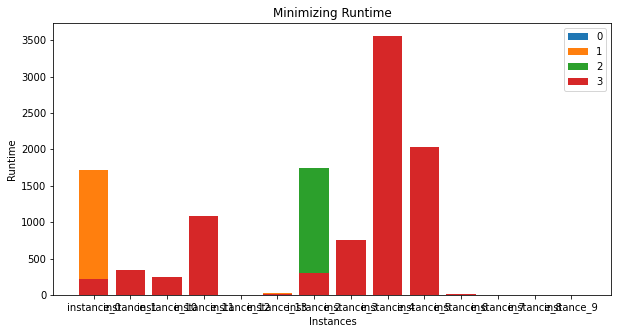

In [87]:
#plot names
batch_list = []
runtime_list = []
folder_instance = []
instance_num_list = []



find_inst = os.listdir(mypath + '/' + dirnames[0])
for name in find_inst:
    if name[0] == 'i':
        instance_num_list.append(name[:-4])
        
#folder_instance = [instance_num_list] * count
plt.figure(figsize=(10, 5))
for i in range(0, count):
    folder_instance.append(instance_num_list)    
    batch_list = []
    label_list = []
    for j in range(0, len(instance_num_list)):
        batch = retrieve_instance_result(i, j)
        batch_list.append(batch[0])
    runtime_list.append(batch_list[:len(instance_num_list)])
    plt.bar(folder_instance[i], runtime_list[i], label=i)
    plt.title(f'Minimizing Runtime')
    plt.xlabel("Instances")
    plt.ylabel("Runtime")
    plt.legend()
        
        
        

In [88]:
len(folder_instance[0]), len(runtime_list[0])

(14, 14)

In [89]:
#plot names
batch_list = []
list_batch = []
folder_instance = []
instance_num_list = []



find_inst = os.listdir(mypath + '/' + dirnames[0])
for name in find_inst:
    if name[0] == 'i':
        instance_num_list.append(name[:-4])
        
#folder_instance = [instance_num_list] * count
plt.figure(figsize=(10, 5))
for i in range(0, count):
    folder_instance.append(instance_num_list)    
    batch_list = []
    label_list = []
    for j in range(0, len(instance_num_list)):
        batch = retrieve_instance_result(i, j)
        batch_list.append(batch[0])
        
    list_batch.append(batch_list[:len(instance_num_list)])
 
        

<Figure size 720x360 with 0 Axes>

In [121]:
#plot names
obj_list = []
runtime_list = []
folder_instance = []
instance_num_list = []
retrieve_instance_result_list = []
status_list = []


find_inst = os.listdir(mypath + '/' + dirnames[0])
for name in find_inst:
    if name[0] == 'i':
        instance_num_list.append(name[:-4])
        
#folder_instance = [instance_num_list] * count
plt.figure(figsize=(10, 5))
for i in range(0, count):
    folder_instance.append(instance_num_list)    
    runtime = []
    label_list = []
    obj = []
    status_l = []
    
    rt_l = []
    obj_l = []
    st_l = []
    
    for j in range(len(instance_num_list)):
        batch = retrieve_instance_result(i, j)
        retrieve_instance_result_list.append(batch)
        runtime.append(batch[0])
        obj.append(batch[1])
        status_l.append(batch[2])
        
    runtime_list.append(runtime[:len(instance_num_list)])
    obj_list.append(obj[:len(instance_num_list)])
    status_list.append(status_l[:len(instance_num_list)])

<Figure size 720x360 with 0 Axes>

In [119]:
len(runtime_list), len(obj_list), len(status_list)

(4, 4, 4)

In [92]:
folder_instance[0]

['instance_0',
 'instance_1',
 'instance_10',
 'instance_11',
 'instance_12',
 'instance_13',
 'instance_2',
 'instance_3',
 'instance_4',
 'instance_5',
 'instance_6',
 'instance_7',
 'instance_8',
 'instance_9']

In [151]:
runtime_list[0]

[353.8899999999994,
 278.6409999999887,
 138.70299999999406,
 249.70300000000861,
 1.639999999999418,
 7.062999999994645,
 123.17199999999139,
 448.1869999999908,
 1057.3910000000033,
 530.1720000000059,
 3.311999999990803,
 2.7030000000086147,
 2.3439999999973224,
 3.8909999999887077]

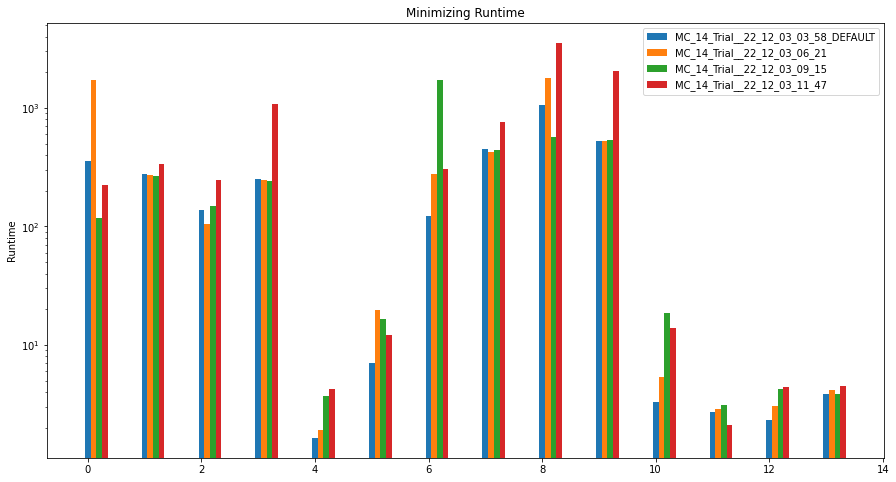

In [93]:
plt.figure(figsize=(15, 8))
X = np.arange(14)
plt.bar(X, runtime_list[0], label=i, width = 0.1)
plt.bar(X + 0.1, runtime_list[1], width = 0.1)
plt.bar(X + 0.2, runtime_list[2], width = 0.1)
plt.bar(X + 0.3, runtime_list[3], width = 0.1)
plt.title(f'Minimizing Runtime')
plt.ylabel("Runtime")
plt.legend([dir_name_list[0], dir_name_list[1], dir_name_list[2], dir_name_list[3]])
plt.yscale('log')

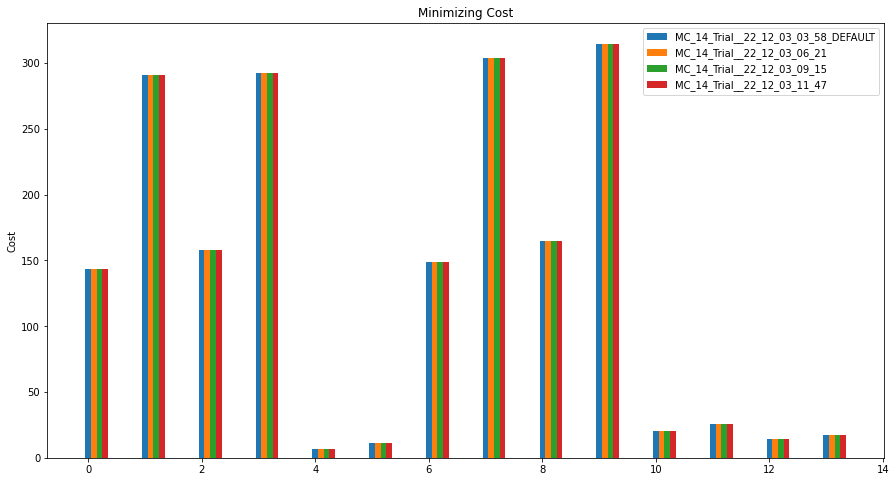

In [94]:
plt.figure(figsize=(15, 8))
X = np.arange(14)
plt.bar(X, obj_list[0], label=i, width = 0.1)
plt.bar(X + 0.1, obj_list[1], width = 0.1)
plt.bar(X + 0.2, obj_list[2], width = 0.1)
plt.bar(X + 0.3, obj_list[3], width = 0.1)
plt.title(f'Minimizing Cost')
plt.ylabel("Cost")
plt.legend([dir_name_list[0], dir_name_list[1], dir_name_list[2], dir_name_list[3]])


In [95]:
retrieve_instance_result_list

[(353.8899999999994, 143.76666666666677, 'bound'),
 (278.6409999999887, 290.69999999999993, 'bound'),
 (138.70299999999406, 158.0, 'solution'),
 (249.70300000000861, 292.70000000000005, 'bound'),
 (1.639999999999418, 7.0, 'solution'),
 (7.062999999994645, 11.0, 'solution'),
 (123.17199999999139, 148.58333333333331, 'bound'),
 (448.1869999999908, 303.6666666666667, 'bound'),
 (1057.3910000000033, 164.93333333333334, 'bound'),
 (530.1720000000059, 314.8, 'bound'),
 (3.311999999990803, 20.0, 'solution'),
 (2.7030000000086147, 26.0, 'solution'),
 (2.3439999999973224, 14.0, 'solution'),
 (3.8909999999887077, 17.0, 'solution'),
 (1710.1879999999946, 143.7666666666667, 'bound'),
 (272.92200000000594, 290.69999999999993, 'bound'),
 (105.71899999999732, 158.0, 'solution'),
 (245.57800000000861, 292.70000000000005, 'bound'),
 (1.9059999999881256, 7.0, 'solution'),
 (19.64100000000326, 11.0, 'solution'),
 (278.6560000000027, 148.58333333333334, 'bound'),
 (429.43700000000536, 303.6666666666667, '

In [100]:
file = r"C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\Results_T1\MC_14_Trial__22_12_03_03_58_DEFAULT\DF_Schedual_0.csv"
df_schedule = pd.read_csv(file)
df_schedule = df_schedule.drop(["Unnamed: 0"],axis=1)
display(df_schedule)

,timeslot,EXAM,TIMESLOT,ROOM,Room Size,Class Size,Student ID
0,0,CHE204H1F,2022-04-11 : 09:00:00,MS 3153,79,62,"['0x0B5B2A62045B3235A20D7810B9869FFCC29FD3A7',..."
1,0,CIV102H1F,2022-04-11 : 09:00:00,BN 3,231,170,"['0x28C962A67CBBE05F409440FFB60470F45155BBD1',..."
2,0,CME321H1F,2022-04-11 : 09:00:00,MS 2158,143,54,"['0x5AD65147C64D1066C2EA5E1F85CE432DE39202A5',..."
3,0,CME499Y1Y,2022-04-11 : 09:00:00,MS 3154,69,5,"['0x6DB317ECEA0AE31227CA28F76128055884000F21',..."
4,0,APS320H1F,2022-04-11 : 09:00:00,MC 254,38,15,"['0x81B75EE5FDC4D9E29855953456F6DC3E18E880B9',..."
...,...,...,...,...,...,...,...
149,63,APS446H1F,2022-04-30 : 14:00:00,MS 3153,79,7,"['0x34B13805A29899CFB6F6DA8C1DF5A03B9AC3ACD6',..."
150,63,ECE316H1F,2022-04-30 : 14:00:00,MS 2172,37,10,"['0x0AA0CE73FB98DC77000C9EDFE4192F3B94963710',..."
151,63,JRE410H1F,2022-04-30 : 14:00:00,BN 2S,384,88,"['0x71D1BB3B0FB409D81F0B2E657CC72B293697A337',..."
152,63,AER307H1F,2022-04-30 : 14:00:00,MY 150,235,11,"['0x85079A6BF5703EF363621F35D4E45FDE94A7CB98',..."


In [101]:
file = r"C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\MC_14_Trial__22_12_03_15_44\DF_Schedual_0_timefail.csv"
df_schedule = pd.read_csv(file)
df_schedule = df_schedule.drop(["Unnamed: 0"],axis=1)
display(df_schedule)

,Failed (Timeout),timeslot,EXAM,TIMESLOT,ROOM,Room Size,Class Size,Student ID
0,NaN,0,CIV541H1F,2022-04-11 : 09:00:00,BA 1170,36,6,"['0x7D4B19AB4C04D68413A9555DEDA33B017EADDBF9',..."
1,NaN,0,ECE241H1F,2022-04-11 : 09:00:00,BN 2S,384,216,"['0x7BB53A07F24F10D034C8954DB4AE8378768621BD',..."
2,NaN,0,CIV100H1F_2,2022-04-11 : 09:00:00,BN 3,231,215,"['0x81C50CB3AFC33CDA1C5429C80261F1B4193837A3',..."
3,NaN,0,CHE566H1F,2022-04-11 : 09:00:00,RW 110,43,17,"['0x4C60E7C5F3F61ABDA417A93B079B038A3FD2A86D',..."
4,NaN,0,BME344H1F,2022-04-11 : 09:00:00,PB B150,75,9,"['0x109609D1E876AA17BBC7BE2DE63305C5F85739FF',..."
...,...,...,...,...,...,...,...,...
149,NaN,60,MIE451H1F,2022-04-29 : 14:00:00,SF 3202,110,19,"['0x09769DF077ECD0CA4C69BD7EC62F6FE388F0E641',..."
150,NaN,60,APS062H1F,2022-04-29 : 14:00:00,MY 330,36,25,"['0x4B7D9E7EB46A6752E925A2DB79458124E3F8AB39',..."
151,NaN,60,ECE311H1F,2022-04-29 : 14:00:00,EX 310,106,91,"['0x82604E6BC105931AF6096661638F555A486FE751',..."
152,NaN,61,APM384H1F,2022-04-29 : 18:30:00,EX 100,309,28,"['0x7F992B8733D54E1CAE7B85CF6EC7F36C58CD946A',..."


In [106]:
len(runtime_list)

4

In [152]:
df_batch_1 = pd.DataFrame({
    "(1) Status": status_list[0],
    "Runtime": runtime_list[0],
    "Obj Value": obj_list[0]
})

df_batch_1

,(1) Status,Runtime,Obj Value
0,bound,353.890,143.766667
1,bound,278.641,290.700000
2,solution,138.703,158.000000
3,bound,249.703,292.700000
4,solution,1.640,7.000000
5,solution,7.063,11.000000
6,bound,123.172,148.583333
7,bound,448.187,303.666667
8,bound,1057.391,164.933333
9,bound,530.172,314.800000


In [153]:
df_batch_2 = pd.DataFrame({
    "(2) Status": status_list[1],
    "Runtime": runtime_list[1],
    "Obj Value": obj_list[1]
})

df_batch_2

,(2) Status,Runtime,Obj Value
0,bound,1710.188,143.766667
1,bound,272.922,290.700000
2,solution,105.719,158.000000
3,bound,245.578,292.700000
4,solution,1.906,7.000000
5,solution,19.641,11.000000
6,bound,278.656,148.583333
7,bound,429.437,303.666667
8,bound,1790.110,164.933333
9,bound,526.625,314.800000


In [154]:
df_batch_3 = pd.DataFrame({
    "(3) Status": status_list[2],
    "Runtime": runtime_list[2],
    "Obj Value": obj_list[2]
})

df_batch_3

,(3) Status,Runtime,Obj Value
0,bound,117.282,143.766667
1,bound,267.500,290.700000
2,solution,149.110,158.000000
3,bound,240.781,292.700000
4,solution,3.734,7.000000
5,solution,16.515,11.000000
6,bound,1737.922,148.583333
7,bound,439.125,303.666667
8,bound,567.282,164.933333
9,bound,537.281,314.800000


In [155]:
df_batch_4 = pd.DataFrame({
    "(4) Status": status_list[3],
    "Runtime": runtime_list[3],
    "Obj Value": obj_list[3]
})

df_batch_4

,(4) Status,Runtime,Obj Value
0,bound,224.610,143.766667
1,bound,336.796,290.700000
2,solution,246.718,158.000000
3,bound,1078.203,292.700000
4,solution,4.218,7.000000
5,solution,12.219,11.000000
6,bound,306.344,148.583333
7,bound,757.813,303.666667
8,bound,3558.093,164.933333
9,bound,2038.938,314.800000


In [157]:
pd.concat([df_batch_1, df_batch_2, df_batch_3, df_batch_4], axis=1)#.drop("Obj Value",axis=1)

,(1) Status,Runtime,Obj Value,(2) Status,Runtime,Obj Value,(3) Status,Runtime,Obj Value,(4) Status,Runtime,Obj Value
0,bound,353.890,143.766667,bound,1710.188,143.766667,bound,117.282,143.766667,bound,224.610,143.766667
1,bound,278.641,290.700000,bound,272.922,290.700000,bound,267.500,290.700000,bound,336.796,290.700000
2,solution,138.703,158.000000,solution,105.719,158.000000,solution,149.110,158.000000,solution,246.718,158.000000
3,bound,249.703,292.700000,bound,245.578,292.700000,bound,240.781,292.700000,bound,1078.203,292.700000
4,solution,1.640,7.000000,solution,1.906,7.000000,solution,3.734,7.000000,solution,4.218,7.000000
5,solution,7.063,11.000000,solution,19.641,11.000000,solution,16.515,11.000000,solution,12.219,11.000000
6,bound,123.172,148.583333,bound,278.656,148.583333,bound,1737.922,148.583333,bound,306.344,148.583333
7,bound,448.187,303.666667,bound,429.437,303.666667,bound,439.125,303.666667,bound,757.813,303.666667
8,bound,1057.391,164.933333,bound,1790.110,164.933333,bound,567.282,164.933333,bound,3558.093,164.933333
9,bound,530.172,314.800000,bound,526.625,314.800000,bound,537.281,314.800000,bound,2038.938,314.800000
